# MODEL 3 1-3-2
### Contains only fixed-before-conditional trials without intervening BLs
### Combines A & C trials into single regressor
### Accounts for last three noisy volumes in Lvl 1 analysis (FSL ROI -- ExtractROI)

## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Putamen (FS labels: putamen [12, 51])

In [1]:
import os
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(mask_filenames_glob)

    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/fixed_before_conditional/model3_1-3-2/' 
                          + SID + '/fixedfx/cope_*')
    cope_files.append(subjcopes_glob)
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

In [ ]:
print 'left hippocampus'
print(mask_filenames[0][0]) #lh-hippocampus
print 'left caudate'
print(mask_filenames[0][1]) #lh-caudate
print 'right caudate'
print(mask_filenames[0][2]) #rh-caudate
print 'right hippocampus'
print(mask_filenames[0][3]) #rh-hippocamus
print 'left putamen'
print(mask_filenames[0][4]) #lh-putamen
print 'right putamen'
print(mask_filenames[0][5]) #rh-putamen

print '-----'

print 'all_before_B_corr'
print(cope_files[0][0]) #A_before_B_corr
print 'all_before_B_incorr'
print(cope_files[0][1]) #A_before_B_incorr
print 'all_remaining'
print(cope_files[0][2]) #C_before_B_corr
print 'all_corr_vs_all_incorr'
print(cope_files[0][3]) #C_before_B_incorr
print 'all_incorr_vs_all_corr'
print(cope_files[0][4]) #all_A_and_C



#for i in cope_files:
#    print(len(i))

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [4]:
import nibabel as nb
import pandas as pd
import numpy as np


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lhhp_all_before_B_corr':[], 'rhhp_all_before_B_corr':[], 
            'lhhp_all_before_B_incorr':[], 'rhhp_all_before_B_incorr':[],
            
            'lhcaudate_all_before_B_corr':[], 'rhcaudate_all_before_B_corr':[], 
            'lhcaudate_all_before_B_incorr':[], 'rhcaudate_all_before_B_incorr':[],
            
            'lhputamen_all_before_B_corr':[], 'rhputamen_all_before_B_corr':[], 
            'lhputamen_all_before_B_incorr':[], 'rhputamen_all_before_B_incorr':[],}


# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][3])
    lh_caudate_img = nb.load(mask_filenames[i][1])
    rh_caudate_img = nb.load(mask_filenames[i][2])
    lh_putamen_img = nb.load(mask_filenames[i][4])
    rh_putamen_img = nb.load(mask_filenames[i][5])

    
    #Load copes for individual trial types
    all_before_B_corr_img = nb.load(cope_files[i][0])
    all_before_B_incorr_img = nb.load(cope_files[i][1])

    
    
    ########################
    ### Left Hippocampus ###
    ########################
    
    # all_before_B_corr
    lh_hp_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_before_B_corr'].append(np.mean(lh_hp_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_hp_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_all_before_B_incorr'].append(np.mean(lh_hp_all_before_B_incorr_data))
    
    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # all_before_B_corr
    rh_hp_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_before_B_corr'].append(np.mean(rh_hp_all_before_B_corr_data))

    # all_before_B_incorr
    rh_hp_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_all_before_B_incorr'].append(np.mean(rh_hp_all_before_B_incorr_data))

    
    ####################
    ### Left Caudate ###
    ####################
    
    # all_before_B_corr
    lh_caudate_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_before_B_corr'].append(np.mean(lh_caudate_all_before_B_corr_data))
    
    lh_data = eval('{0}_img.get_data()[lh_{1}_img.get_data() > 0.]'.format(l,r))
    all_data['lh{0}_{1}'.format(r,l)].append(np.mean(lh_data))
    
    # all_before_B_incorr
    lh_caudate_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_all_before_B_incorr'].append(np.mean(lh_caudate_all_before_B_incorr_data))
    
    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # all_before_B_corr
    rh_caudate_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_before_B_corr'].append(np.mean(rh_caudate_all_before_B_corr_data))

    # all_before_B_incorr
    rh_caudate_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_all_before_B_incorr'].append(np.mean(rh_caudate_all_before_B_incorr_data))
    
    
    ####################
    ### Left Putamen ###
    ####################
    
    # all_before_B_corr
    lh_putamen_all_before_B_corr_data = all_before_B_corr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_before_B_corr'].append(np.mean(lh_putamen_all_before_B_corr_data))
    
    # all_before_B_incorr
    lh_putamen_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_all_before_B_incorr'].append(np.mean(lh_putamen_all_before_B_incorr_data))
    
    
    #####################
    ### Right Putamen ###
    #####################
    
    # all_before_B_corr
    rh_putamen_all_before_B_corr_data = all_before_B_corr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_before_B_corr'].append(np.mean(rh_putamen_all_before_B_corr_data))

    # all_before_B_incorr
    rh_putamen_all_before_B_incorr_data = all_before_B_incorr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_all_before_B_incorr'].append(np.mean(rh_putamen_all_before_B_incorr_data))

    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average

In [5]:
#Hippocampus average for each trial type
all_data_df['hp_all_before_B_corr'] = (all_data_df['lhhp_all_before_B_corr'] + 
                                       all_data_df['rhhp_all_before_B_corr'])/2.
all_data_df['hp_all_before_B_incorr'] = (all_data_df['lhhp_all_before_B_incorr'] + 
                                         all_data_df['rhhp_all_before_B_incorr'])/2.


#Caudate average for each trial type
all_data_df['caudate_all_before_B_corr'] = (all_data_df['lhcaudate_all_before_B_corr'] + 
                                            all_data_df['rhcaudate_all_before_B_corr'])/2.
all_data_df['caudate_all_before_B_incorr'] = (all_data_df['lhcaudate_all_before_B_incorr'] + 
                                              all_data_df['rhcaudate_all_before_B_incorr'])/2.


#Putamen average for each trial type
all_data_df['putamen_all_before_B_corr'] = (all_data_df['lhputamen_all_before_B_corr'] + 
                                            all_data_df['rhputamen_all_before_B_corr'])/2.
all_data_df['putamen_all_before_B_incorr'] = (all_data_df['lhputamen_all_before_B_incorr'] + 
                                              all_data_df['rhputamen_all_before_B_incorr'])/2.

In [4]:
all_data_df

,lhcaudate_all_before_B_corr,lhcaudate_all_before_B_incorr,lhhp_all_before_B_corr,lhhp_all_before_B_incorr,lhputamen_all_before_B_corr,lhputamen_all_before_B_incorr,rhcaudate_all_before_B_corr,rhcaudate_all_before_B_incorr,rhhp_all_before_B_corr,rhhp_all_before_B_incorr,rhputamen_all_before_B_corr,rhputamen_all_before_B_incorr,subjid,hp_all_before_B_corr,hp_all_before_B_incorr,caudate_all_before_B_corr,caudate_all_before_B_incorr,putamen_all_before_B_corr,putamen_all_before_B_incorr
0,5.250131,4.417264,0.964872,-1.283678,5.270888,3.094527,5.926782,7.824470,1.244791,-1.108707,4.340364,2.529968,WMAZE_001,1.104831,-1.196193,5.588456,6.120867,4.805626,2.812248
1,-1.252151,-0.375236,-4.149496,-5.426163,-0.369003,-3.115293,-0.335033,0.106410,-2.956450,-3.536166,-0.824425,-4.101454,WMAZE_002,-3.552973,-4.481165,-0.793592,-0.134413,-0.596714,-3.608373
2,0.926513,0.598959,0.452593,0.610961,2.319185,1.808277,1.947451,1.682437,2.275277,2.252782,2.245446,2.418164,WMAZE_004,1.363935,1.431871,1.436982,1.140698,2.282315,2.113221
3,2.740747,4.580894,-1.024853,-2.197122,-0.600583,-0.802113,2.734487,4.159132,0.213628,-1.368090,-0.725448,-0.481465,WMAZE_005,-0.405612,-1.782606,2.737617,4.370013,-0.663015,-0.641789
4,-3.118724,-1.848763,-1.264782,-2.093899,-0.993426,-1.397590,-1.954458,0.029583,-0.471936,-1.616902,-0.727781,-0.443344,WMAZE_006,-0.868359,-1.855401,-2.536591,-0.909590,-0.860603,-0.920467
5,5.045730,4.722976,0.328586,0.009007,5.964610,3.912180,3.572873,4.082376,2.136802,2.336142,5.556261,4.110975,WMAZE_007,1.232694,1.172575,4.309301,4.402676,5.760435,4.011577
6,-2.361396,-0.776354,-2.588463,-4.061266,-1.584911,-2.500250,-1.759464,1.456902,-2.056144,-3.853992,-2.884487,-3.291086,WMAZE_008,-2.322303,-3.957629,-2.060430,0.340274,-2.234699,-2.895668
7,-1.475719,1.504890,-1.830864,-2.051621,-1.989950,-2.127942,-0.989628,0.043815,-1.431654,-1.935825,-0.982045,-0.527581,WMAZE_009,-1.631259,-1.993723,-1.232673,0.774353,-1.485998,-1.327761
8,-0.649433,-3.256678,-4.629577,-6.629375,-1.269540,-3.220399,2.128206,-0.056366,-4.426325,-5.869525,-0.745367,-2.913832,WMAZE_010,-4.527951,-6.249450,0.739386,-1.656522,-1.007453,-3.067116
9,0.375958,0.303255,-1.961734,-2.472602,0.622092,1.803306,0.433859,0.098351,-2.261076,-1.744004,0.723281,1.675123,WMAZE_012,-2.111405,-2.108303,0.404909,0.200803,0.672686,1.739214


In [6]:
#Provides performance for Conditional trials

%matplotlib inline
from os.path import join
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from glob import glob
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 'WMAZE_007',
        'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 'WMAZE_017', 'WMAZE_018',
        'WMAZE_019', 'WMAZE_020', 'WMAZE_021', 'WMAZE_022', 'WMAZE_023', 'WMAZE_024',
        'WMAZE_026', 'WMAZE_027']

all_prop_B_corr = []

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))   
    dir_file.sort()    
    
    data_run1 = pd.read_table(dir_file[0])
    data_run1 = data_run1[:-3]
    data_run2 = pd.read_table(dir_file[1])
    data_run2 = data_run2[:-3]
    data_run3 = pd.read_table(dir_file[2])
    data_run3 = data_run3[:-3]
    data_run4 = pd.read_table(dir_file[3])
    data_run4 = data_run4[:-3]
    data_run5 = pd.read_table(dir_file[4])
    data_run5 = data_run5[:-3]
    data_run6 = pd.read_table(dir_file[5])
    data_run6 = data_run6[:-3]
    
    all_runs = [data_run1, data_run2, data_run3, data_run4, data_run5, data_run6]    
    data_set = pd.concat(all_runs)
    
    trialtype = data_set['TrialType'].values
    correct = data_set['Correct'].values 
    
    all_B_corr = np.where((trialtype == 'B') & (correct == 1))[0]
    all_B_incorr = np.where((trialtype == 'B') & (correct == 0))[0]
    
    prop_B_corr = len(all_B_corr)/float(len(all_B_corr) + len(all_B_incorr))
    all_prop_B_corr.append(prop_B_corr)

## Hippocampus Stats

all_before_B_corr mean
-1.30885470174
all_before_B_incorr
-2.4400381187
T-test: Hippocampus all_before_B_corr vs. all_before_B_incorr
Ttest_relResult(statistic=4.0552400236334325, pvalue=0.00067536878486218607)
Cohen's d =  0.805641694762


/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


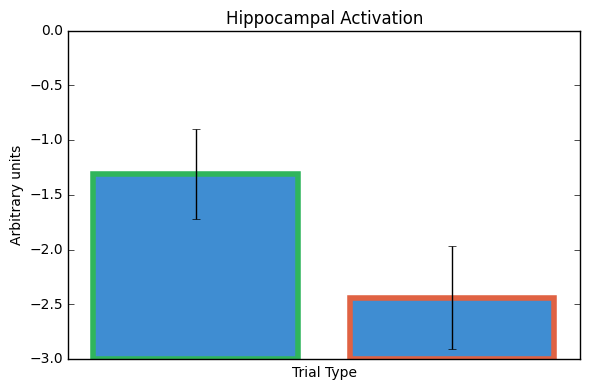

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")

from scipy import stats
from math import sqrt

print 'all_before_B_corr mean'
print all_data_df['hp_all_before_B_corr'].mean()
print 'all_before_B_incorr'
print all_data_df['hp_all_before_B_incorr'].mean()


print 'T-test: Hippocampus all_before_B_corr vs. all_before_B_incorr'
print stats.ttest_rel(all_data_df['hp_all_before_B_corr'], all_data_df['hp_all_before_B_incorr'])

cohens_d = ((np.average(all_data_df['hp_all_before_B_corr']) - np.average(all_data_df['hp_all_before_B_incorr'])) 
            / (sqrt((np.std(all_data_df['hp_all_before_B_corr'], ddof = 1)) 
            ** 2 + np.std(all_data_df['hp_all_before_B_incorr'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d


N = 2
conditions = ['FIXED before Corr COND', 'FIXED before incorr COND']

hp_means_allsubjs = [np.mean(all_data_df['hp_all_before_B_corr']), 
                     np.mean(all_data_df['hp_all_before_B_incorr'])]
hp_sem_allsubjs = [stats.sem(all_data_df['hp_all_before_B_corr']), 
                   stats.sem(all_data_df['hp_all_before_B_incorr'])]
ind = np.arange(N)
fig, ax = plt.subplots()
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

      
ax = sns.barplot(ind, np.array(hp_means_allsubjs)+3, yerr = hp_sem_allsubjs,
                 color = "#278fea", ecolor = 'black', edgecolor = pal, linewidth = 4, bottom = -3)

plt.xticks([], [])
#ax.set_xticklabels(conditions)
ax.set_ylabel('')
ax.set_ylim(-3,0)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.tight_layout()
plt.savefig("/home/data/madlab/scripts/wmaze/anal_MR_thesis/fixed_before_conditional/model3/chpc_activation.jpg")
plt.show()

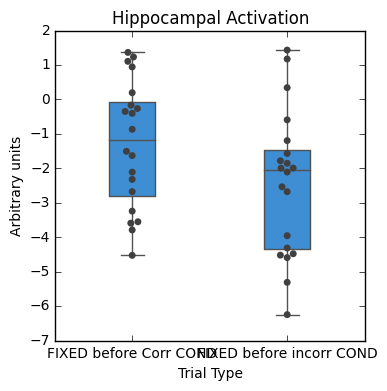

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")

from scipy import stats
from math import sqrt

N = 2
conditions = ['FIXED before Corr COND', 'FIXED before incorr COND']

hp_allsubjs = [all_data_df['hp_all_before_B_corr'], 
               all_data_df['hp_all_before_B_incorr']]
ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')

#ax = sns.barplot(ind, np.array(hp_means_allsubjs)+3, yerr = hp_sem_allsubjs,
#                 color = "#278fea", ecolor = 'black', edgecolor = pal, linewidth = 4, bottom = -3)

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.savefig("/home/arenf001/model3HPC_activation.jpg", dpi = 1080)
plt.show()

## Caudate Stats

all_before_B_corr
0.842863067612
all_before_B_incorr
1.32298891358
T-test: Caudate all_before_B_corr vs. all_before_B_incorr
Ttest_relResult(statistic=-1.5067181720815932, pvalue=0.14832917492269207)
Cohen's d =  -0.32713691091


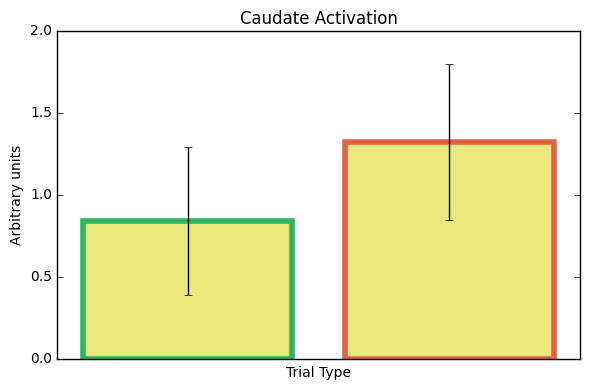

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats

print 'all_before_B_corr'
print all_data_df['caudate_all_before_B_corr'].mean()
print 'all_before_B_incorr'
print all_data_df['caudate_all_before_B_incorr'].mean()

print 'T-test: Caudate all_before_B_corr vs. all_before_B_incorr'
print stats.ttest_rel(all_data_df['caudate_all_before_B_corr'], all_data_df['caudate_all_before_B_incorr'])

cohens_d = ((np.average(all_data_df['caudate_all_before_B_corr']) 
             - np.average(all_data_df['caudate_all_before_B_incorr'])) 
            / (sqrt((np.std(all_data_df['caudate_all_before_B_corr'], ddof = 1)) 
            ** 2 + np.std(all_data_df['caudate_all_before_B_incorr'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['FIXED before Corr COND', 'FIXED before incorr COND']

caudate_means_allsubjs = [np.mean(all_data_df['caudate_all_before_B_corr']), 
                          np.mean(all_data_df['caudate_all_before_B_incorr'])]
caudate_sem_allsubjs = [stats.sem(all_data_df['caudate_all_before_B_corr']), 
                        stats.sem(all_data_df['caudate_all_before_B_incorr'])]

fig, ax = plt.subplots()

pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

ax = sns.barplot(ind, caudate_means_allsubjs, yerr = caudate_sem_allsubjs, 
                 color = "#f9f96d", ecolor = 'black', edgecolor = pal, linewidth = 4)
plt.xticks([], [])
#ax.set_xticklabels(conditions)
ax.set_ylabel('')
ax.set_ylim(0,2)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.tight_layout()
#plt.savefig("/home/data/madlab/scripts/wmaze/anal_MR_thesis/fixed_before_conditional/model3/caudate_activation.jpg")
plt.show()

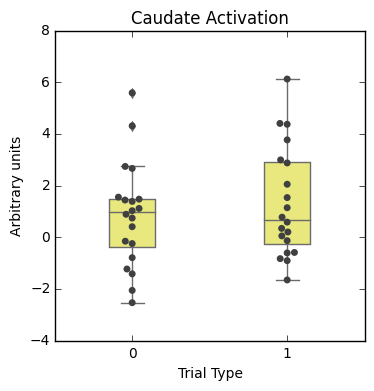

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")

from scipy import stats
from math import sqrt

N = 2
conditions = ['FIXED before Corr COND', 'FIXED before incorr COND']

caudate_allsubjs = [all_data_df['caudate_all_before_B_corr'], 
               all_data_df['caudate_all_before_B_incorr']]
ind = np.arange(N)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = caudate_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caudate_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.savefig("/home/arenf001/model3caudate_activation.jpg", dpi = 1080)
plt.show()

## Putamen Stats

all_before_B_corr
0.733108835854
all_before_B_incorr
-0.481846473366
T-test: putamen all_before_B_corr vs. all_before_B_incorr
Ttest_relResult(statistic=3.4841295178852945, pvalue=0.0024831668189734114)
Cohen's d =  0.741198380783


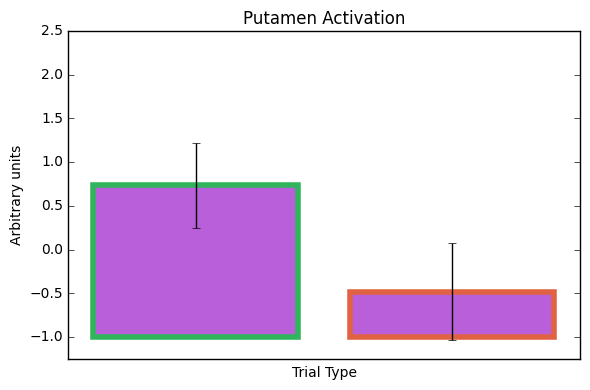

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats

print 'all_before_B_corr'
print all_data_df['putamen_all_before_B_corr'].mean()
print 'all_before_B_incorr'
print all_data_df['putamen_all_before_B_incorr'].mean()

print 'T-test: putamen all_before_B_corr vs. all_before_B_incorr'
print stats.ttest_rel(all_data_df['putamen_all_before_B_corr'], all_data_df['putamen_all_before_B_incorr'])

cohens_d = ((np.average(all_data_df['putamen_all_before_B_corr']) 
             - np.average(all_data_df['putamen_all_before_B_incorr'])) 
            / (sqrt((np.std(all_data_df['putamen_all_before_B_corr'], ddof = 1)) 
            ** 2 + np.std(all_data_df['putamen_all_before_B_incorr'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['FIXED before Corr COND', 'FIXED before incorr COND']

putamen_means_allsubjs = [np.mean(all_data_df['putamen_all_before_B_corr']), 
                          np.mean(all_data_df['putamen_all_before_B_incorr'])]
putamen_sem_allsubjs = [stats.sem(all_data_df['putamen_all_before_B_corr']), 
                        stats.sem(all_data_df['putamen_all_before_B_incorr'])]
ind = np.arange(N)
fig, ax = plt.subplots()

pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

sns.barplot(ind, np.array(putamen_means_allsubjs)+1, yerr = putamen_sem_allsubjs, 
            color = "#c34aef", ecolor = 'black', edgecolor = pal, linewidth = 4, bottom = -1)

plt.xticks([], [])
ax.set_xticklabels(conditions)
ax.set_ylabel('')
ax.set_ylim(-1.25,2.5)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.tight_layout()
#plt.savefig("/home/data/madlab/scripts/wmaze/anal_MR_thesis/fixed_before_conditional/model3/caudate_activation.jpg")
plt.show()

# Fancy plots

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")

from scipy import stats
from math import sqrt

N = 2
conditions = ['FIXED before Corr COND', 'FIXED before incorr COND']

putamen_allsubjs = [all_data_df['putamen_all_before_B_corr'], 
               all_data_df['putamen_all_before_B_incorr']]
ind = np.arange(N)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = putamen_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = putamen_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.savefig("/home/arenf001/model3putamen_activation.jpg", dpi = 1080)
plt.show()

In [ ]:
#violin plot -- Huntington Beach 2018

cols = [['hp_all_before_B_corr', 'hp_all_before_B_incorr'],
        ['caudate_all_before_B_corr', 'caudate_all_before_B_incorr'],
        ['putamen_all_before_B_corr', 'putamen_all_before_B_incorr']]
rois = ['Hippocampus', 'Caudate', 'Putamen']

fig, axes = plt.subplots(ncols = 3, figsize = (10, 4), sharey = True)

for i, roi in enumerate(rois):
    pal = ["#17d14b", "#e03c4a"]
    pal = sns.color_palette(pal)
    temp_df = all_data_df[cols[i]]
    temp_df = temp_df.rename(columns = {cols[i][0]: 'Fixed Before\nCorr Cond',
                                        cols[i][1]: 'Fixed Before\nIncorr Cond'})
    temp_df['subject'] = temp_df.index
    temp_df = pd.melt(temp_df, id_vars = 'subject',
                      value_vars = ['Fixed Before\nCorr Cond',
                                    'Fixed Before\nIncorr Cond'],
                      value_name = 'Arbitrary units', var_name = 'Trial Pair')
    sns.violinplot(data = temp_df, x = 'Trial Pair', y = 'Arbitrary units', ax = axes[i], palette = pal)
    axes[i].set_yticks(np.arange(-10, 10, step = 2))
    axes[i].set_title(roi, fontsize = 16)
    axes[i].set_ylim((-10, 10))
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
%matplotlib inline
from os.path import join
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from glob import glob
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 'WMAZE_007',
        'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 'WMAZE_017', 'WMAZE_018',
        'WMAZE_019', 'WMAZE_020', 'WMAZE_021', 'WMAZE_022', 'WMAZE_023', 'WMAZE_024',
        'WMAZE_026', 'WMAZE_027']

all_prop_same = []
all_prop_change = []

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))   
    dir_file.sort()    
    
    data_run1 = pd.read_table(dir_file[0])
    data_run1 = data_run1[:-3]
    data_run2 = pd.read_table(dir_file[1])
    data_run2 = data_run2[:-3]
    data_run3 = pd.read_table(dir_file[2])
    data_run3 = data_run3[:-3]
    data_run4 = pd.read_table(dir_file[3])
    data_run4 = data_run4[:-3]
    data_run5 = pd.read_table(dir_file[4])
    data_run5 = data_run5[:-3]
    data_run6 = pd.read_table(dir_file[5])
    data_run6 = data_run6[:-3]
    
    all_runs = [data_run1, data_run2, data_run3, data_run4, data_run5, data_run6]    
    data_set = pd.concat(all_runs)
    
    trialtype = data_set['TrialType'].values
    correct = data_set['Correct'].values 
    
    #removing first trial and shifting down 
    trial_shift = trialtype[:-1] 
    trial_shift = np.insert(trial_shift, 0, -1)
    correct_shift = correct[:-1]
    correct_shift = np.insert(correct_shift, 0, -1)
    
    fix_b4_cond_corr = np.where((trialtype == 'A') & (correct == 1) & (trial_shift == 'A'))
    fix_b4_cond_incorr = np.where((trialtype == 'C') & (correct == 1) & (trial_shift == 'C'))
   
 
   
    prop_same = len(same_corr)/float(len(same_corr) + len(same_incorr))
    all_prop_same.append(prop_same)
    prop_change = len(change_corr)/float(len(change_corr) + len(change_incorr))
    all_prop_change.append(prop_change)
    
all_data_df['prop_same'] = all_prop_same
all_data_df['prop_change'] = all_prop_change